In [2]:


## clip lake erie and calculate the mean values of each predictor

import geopandas as gpd
import pandas
import pandas as pd
import xarray as xr
import rioxarray
from xarray.tutorial import open_dataset

lakes = gpd.read_file(
    '/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/Lakes_Boundary/ne_10m_lakes.shp')
lakes = lakes.to_crs(epsg=4326)

variable_mapping = {
    "10m_u_component_of_wind": "u10",
    "10m_v_component_of_wind": "v10",
    "2m_dewpoint_temperature": "d2m",
    "2m_temperature": "t2m",
    "surface_pressure": "sp",
    "total_precipitation": "tp",
    "surface_net_solar_radiation": "ssr",
    "surface_net_thermal_radiation": "str",
    "total_cloud_cover": "tcc",
    "minimum_2m_temperature_since_previous_post_processing": "mn2t",
    "maximum_2m_temperature_since_previous_post_processing": "mx2t"
}

lake_daily_means = []
for var, nc_var in variable_mapping.items():

    file_pattern = f'/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/2009_2023_climate/2009_2023_{var}_daily.nc'
    dataset = xr.open_dataset(file_pattern)

    # Set CRS if not already set
    if not dataset[nc_var].rio.crs:
        dataset[nc_var] = dataset[nc_var].rio.write_crs("EPSG:4326")

    daily_means = []
    for date in dataset['valid_time'].values:
        var_day = dataset.sel(valid_time=date)[nc_var]
        erie_geom = lakes.loc[lakes['name'] == 'Lake Erie', 'geometry'].values[0]
        clipped = var_day.rio.clip([erie_geom], drop=True, all_touched=True)

        # Calculate the mean temperature over the clipped area and store the result
        mean_var = clipped.mean().item()
        daily_means.append({
            'date': pd.Timestamp(date).strftime('%Y-%m-%d'),
            f'mean_{nc_var}': mean_var
        })

    means_df = pd.DataFrame(daily_means)
    lake_daily_means.append(means_df)
daily_lake_mean_df = pd.concat(lake_daily_means, axis=1)

    # # Convert the pivoted DataFrame to an xarray.Dataset
    # ds = pivot_df.to_xarray()
    # output_file_path = f"/Users/shenxiaobo/Desktop/PhD Research/Wildfire Impacts/Data/2013_2023_analysis/counties_2013_2023_{var}_daily.nc"
    # ds.to_netcdf(output_file_path)



KeyboardInterrupt: 

In [32]:
daily_lake_mean_df = daily_lake_mean_df.loc[:, ~daily_lake_mean_df.columns.duplicated()]
daily_lake_mean_df['date'] = pd.to_datetime(daily_lake_mean_df['date'])
daily_lake_mean_df
output_path = '/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/2009_2023_climate/daily_lake_mean_climate.csv'
daily_lake_mean_df.to_csv(output_path, index=False)

AttributeError: 'function' object has no attribute 'loc'

In [1]:

import geopandas as gpd
import pandas as pd
import xarray as xr
import rioxarray
from xarray.tutorial import open_dataset
daily_lake_mean_df = pd.read_csv( '/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/2009_2023_climate/daily_lake_mean_climate.csv')
daily_lake_mean_df 
print(daily_lake_mean_df.columns)
print(daily_lake_mean_df.columns.tolist())


Index(['date', 'mean_u10', 'mean_v10', 'mean_d2m', 'mean_t2m', 'mean_sp',
       'mean_tp', 'mean_ssr', 'mean_str', 'mean_tcc', 'mean_mn2t',
       'mean_mx2t'],
      dtype='object')
['date', 'mean_u10', 'mean_v10', 'mean_d2m', 'mean_t2m', 'mean_sp', 'mean_tp', 'mean_ssr', 'mean_str', 'mean_tcc', 'mean_mn2t', 'mean_mx2t']


## Temporary analysis

In [2]:
daily_lake_mean_df['date'] = pd.to_datetime(daily_lake_mean_df['date'])
daily_lake_mean_df.set_index('date', inplace=True)

daily_lake_mean_df['wind_speed'] = a

aggregation_methods = {
    "mean_u10": "mean",
    "mean_v10": "mean",
    "mean_d2m": "mean",
    "mean_t2m": "mean",
    "mean_sp": "mean",
    "mean_tp": "sum",
    "mean_ssr": "mean",
    "mean_str": "mean",
    "mean_tcc": "mean",
    "mean_mn2t": "min",
    "mean_mx2t": "max"
}
weekly_lake_mean_df = daily_lake_mean_df.resample('W').agg(aggregation_methods)
weekly_lake_mean_df.reset_index(inplace=True)

weekly_lake_mean_df['mean_windspeed'] = 
output_path = '/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/2009_2023_climate/weekly_lake_mean_climate.csv'
weekly_lake_mean_df.to_csv(output_path, index=False)
weekly_lake_mean_df 

,date,mean_u10,mean_v10,mean_d2m,mean_t2m,mean_sp,mean_tp,mean_ssr,mean_str,mean_tcc,mean_mn2t,mean_mx2t
0,2009-01-04,1.554953,0.754932,264.834099,269.582596,99394.658203,0.000123,191298.916016,-196543.644531,0.678805,266.297089,272.258240
1,2009-01-11,2.265165,-0.021771,266.906607,269.649558,98667.049107,0.001446,117933.004464,-140838.706194,0.831225,266.699310,272.870544
2,2009-01-18,3.698470,2.226303,259.415307,262.755650,99655.562500,0.000589,113047.351562,-182706.994420,0.760107,256.070404,271.201141
3,2009-01-25,4.248675,0.952638,262.034751,265.066175,99051.195312,0.000058,137014.765625,-195245.392857,0.703572,259.692566,271.124146
4,2009-02-01,4.074872,2.196444,262.896375,265.797908,99345.921875,0.000897,148945.667411,-167606.338728,0.787677,260.054993,271.504761
...,...,...,...,...,...,...,...,...,...,...,...,...
778,2023-12-03,4.408183,1.912432,273.165532,276.558559,98886.248884,0.000642,239782.821429,-245482.898996,0.799941,271.541290,280.376465
779,2023-12-10,3.602329,1.869362,274.500388,278.356785,98998.758929,0.000440,168540.693638,-129244.351144,0.804097,274.730530,282.842896
780,2023-12-17,4.102733,1.898059,272.035941,277.014866,100244.838170,0.001294,112946.236328,-56180.051586,0.544557,274.800476,280.192078
781,2023-12-24,1.437927,0.516157,273.043762,276.242205,99768.891741,0.000000,NaN,NaN,0.867061,273.169800,278.280243


KeyError: 'wind_spped'

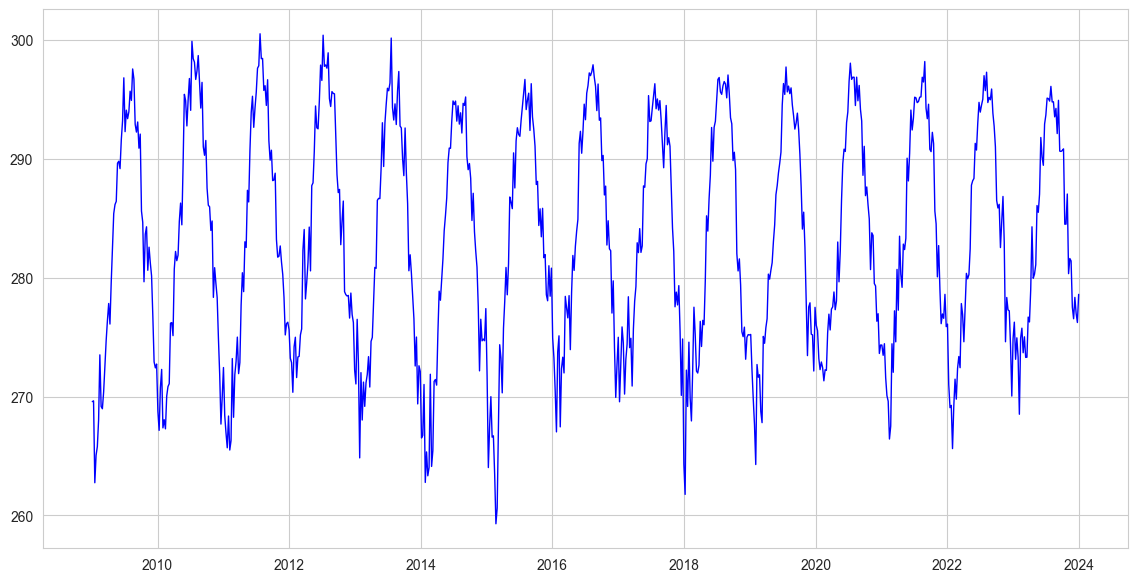

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the weekly data
weekly_lake_mean_df = pd.read_csv('/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/2009_2023_climate/weekly_lake_mean_climate.csv')
weekly_lake_mean_df['date'] = pd.to_datetime(weekly_lake_mean_df['date'])

# Plot the time series for mean_t2m
plt.figure(figsize=(14, 7))
plt.plot(weekly_lake_mean_df['date'], weekly_lake_mean_df['mean_t2m'], label='Mean 2m Temperature', color='blue', linewidth=1)
plt.plot(weekly_lake_mean_df['date'], weekly_lake_mean_df['wind_spped'], label='Mean 2m Temperature', color='blue', linewidth=1)
plt.title('Weekly Mean 2m Temperature Over 15 Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (K)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


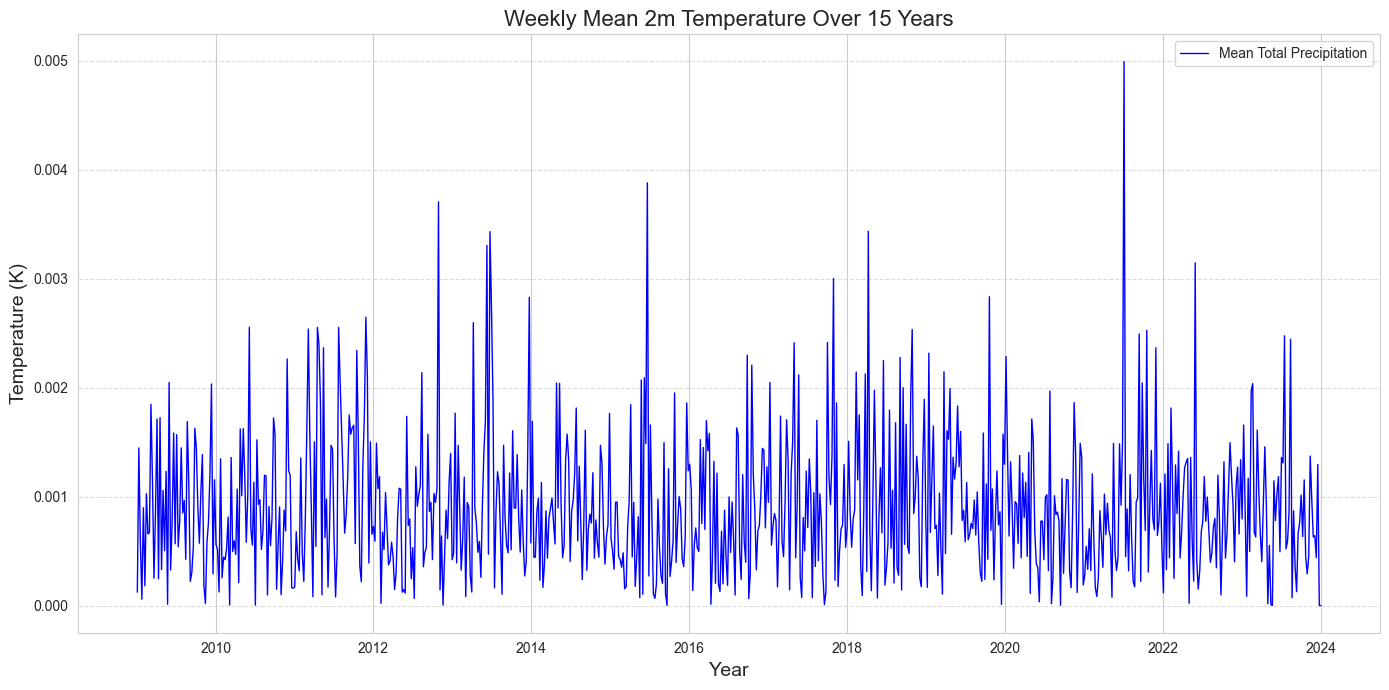

In [9]:
# Plot the time series for mean_tp
plt.figure(figsize=(14, 7))
plt.plot(weekly_lake_mean_df['date'], weekly_lake_mean_df['mean_tp'], label='Mean Total Precipitation', color='blue', linewidth=1)
plt.title('Weekly Mean 2m Temperature Over 15 Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (K)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

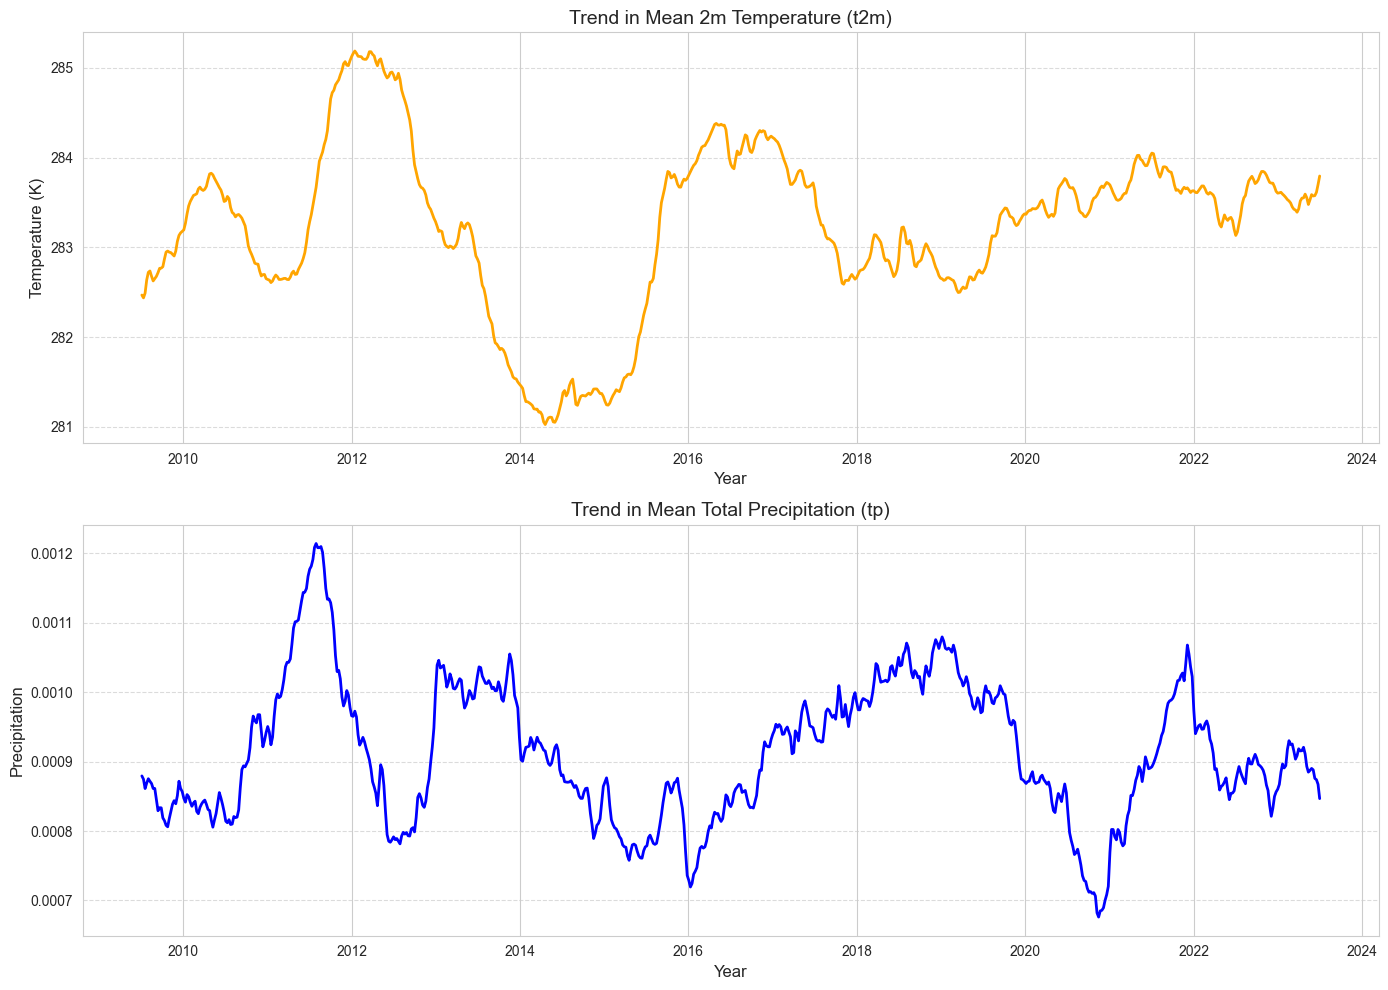

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set 'date' as index if not already done
weekly_lake_mean_df.set_index('date', inplace=True)

# Perform seasonal decomposition
decomposition_t2m = seasonal_decompose(weekly_lake_mean_df['mean_t2m'], model='additive', period=52) 
decomposition_tp = seasonal_decompose(weekly_lake_mean_df['mean_tp'], model='additive', period=52) 

# Plot decomposition
trend_t2m = decomposition_t2m.trend
trend_tp = decomposition_tp.trend

# Create subplots for individual trends
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Trend for mean_t2m
axs[0].plot(trend_t2m, color='orange', linewidth=2)
axs[0].set_title('Trend in Mean 2m Temperature (t2m)', fontsize=14)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('Temperature (K)', fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Trend for mean_tp
axs[1].plot(trend_tp, color='blue', linewidth=2)
axs[1].set_title('Trend in Mean Total Precipitation (tp)', fontsize=14)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Precipitation', fontsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


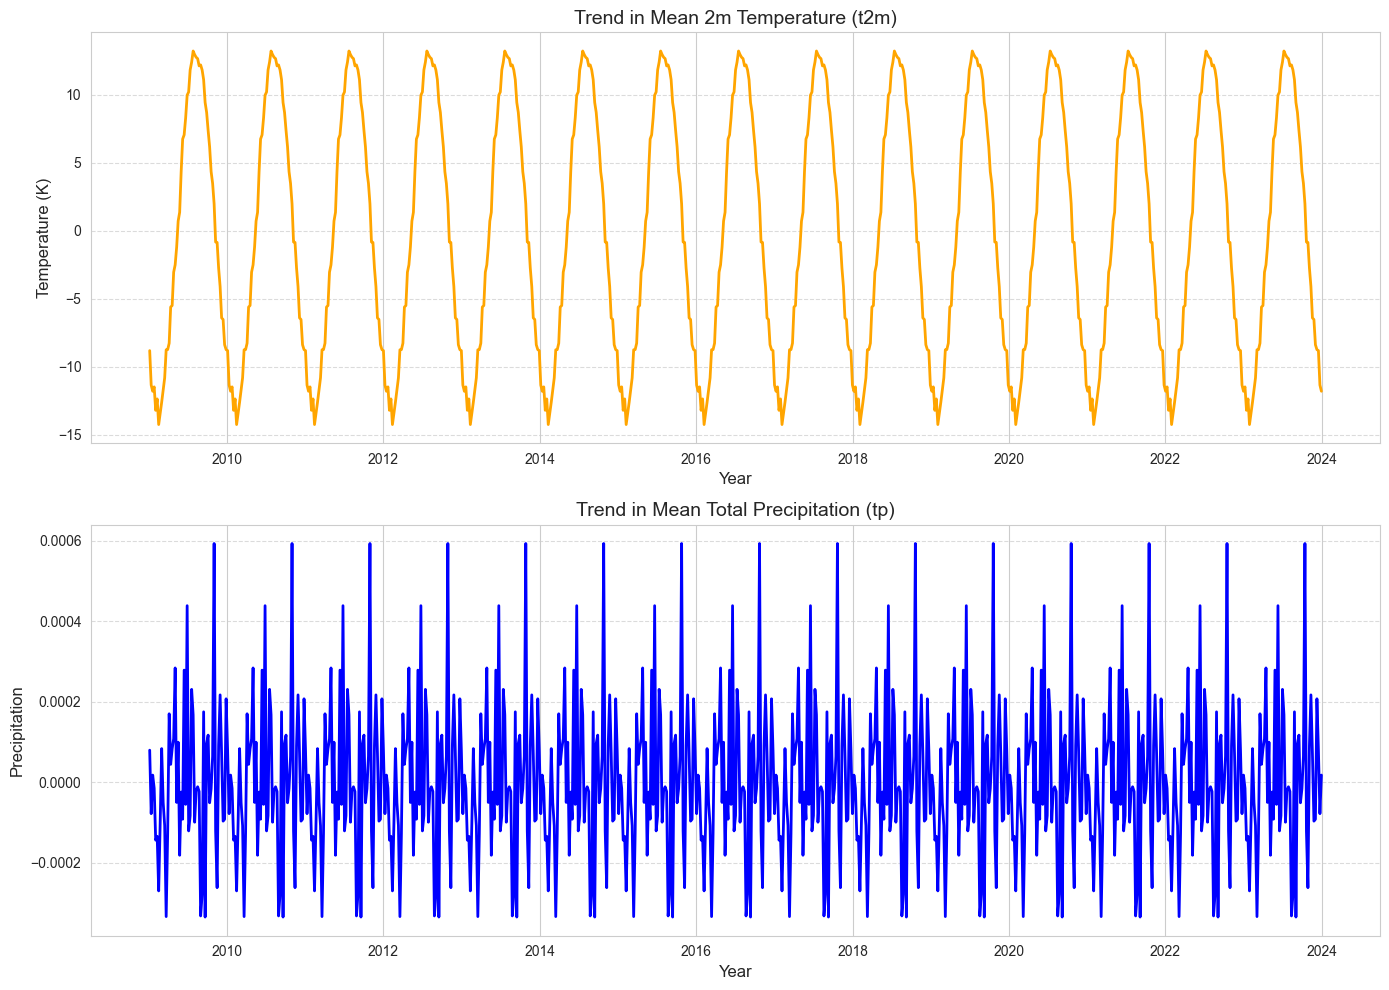

In [10]:
seasonal_t2m = decomposition_t2m.seasonal
seasonal_tp = decomposition_tp.seasonal
# Create subplots for individual trends
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Trend for mean_t2m
axs[0].plot(seasonal_t2m, color='orange', linewidth=2)
axs[0].set_title('Trend in Mean 2m Temperature (t2m)', fontsize=14)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('Temperature (K)', fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Trend for mean_tp
axs[1].plot(seasonal_tp, color='blue', linewidth=2)
axs[1].set_title('Trend in Mean Total Precipitation (tp)', fontsize=14)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Precipitation', fontsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


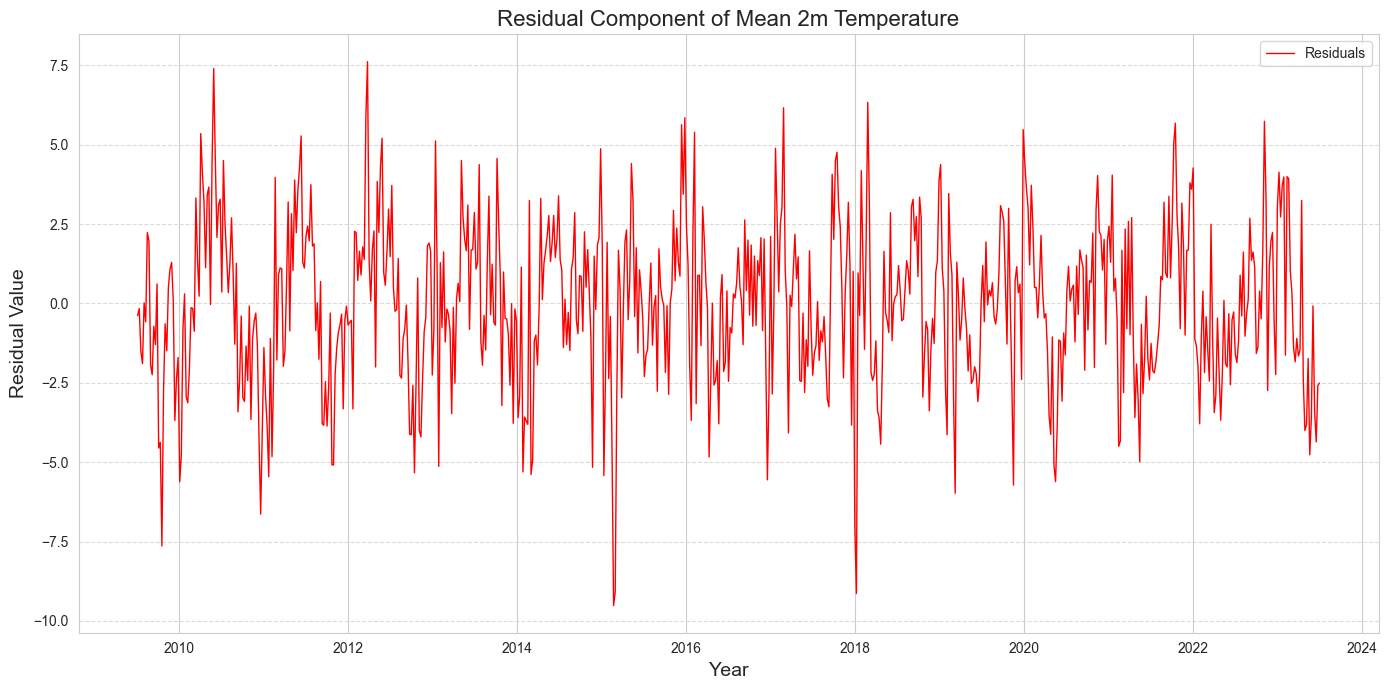

In [3]:
monthly_lake_mean_df = daily_lake_mean_df.resample('M').agg(aggregation_methods)
monthly_lake_mean_df.reset_index(inplace=True)
output_path = '/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/2009_2023_climate/monthly_lake_mean_climate.csv'
monthly_lake_mean_df.to_csv(output_path, index=False)
monthly_lake_mean_df 

/var/folders/7f/4x3f4byj3dn1rx36mbbzv0xw0000gn/T/ipykernel_46598/1592357020.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_lake_mean_df = daily_lake_mean_df.resample('M').agg(aggregation_methods)


,date,mean_u10,mean_v10,mean_d2m,mean_t2m,mean_sp,mean_tp,mean_ssr,mean_str,mean_tcc,mean_mn2t,mean_mx2t
0,2009-01-31,3.226527,1.112223,262.891279,266.111394,99232.415575,0.003113,135076.575605,-172194.229650,0.768686,256.070404,272.870544
1,2009-02-28,2.773420,1.356362,266.969327,270.188442,99398.844029,0.002533,214684.502511,-185404.825509,0.673629,257.536102,278.698914
2,2009-03-31,-0.110587,0.110509,269.148897,273.327016,99745.347530,0.004272,457414.922631,-199746.673041,0.555937,260.113708,279.700378
3,2009-04-30,0.376242,0.050892,275.342459,280.196245,99080.934115,0.004892,667348.767708,-191425.299626,0.622786,272.533966,289.201538
4,2009-05-31,0.918196,0.602531,282.025429,287.738463,99288.056956,0.003801,858294.256048,-265074.067540,0.609417,282.788574,293.650299
...,...,...,...,...,...,...,...,...,...,...,...,...
175,2023-08-31,1.333136,-0.166242,289.783218,293.958771,99072.084929,0.003931,681687.769153,-230146.340096,0.507734,288.871674,296.721191
176,2023-09-30,-0.478755,0.005787,287.748840,291.896308,99526.109896,0.002662,475428.244531,-228379.682292,0.522078,288.673157,298.561829
177,2023-10-31,2.039210,0.294742,282.140722,286.441835,99128.869708,0.002582,300504.092490,-220734.662550,0.656873,277.774170,294.435974
178,2023-11-30,2.789986,1.047399,274.205937,279.478687,99512.613802,0.003433,229891.370964,-222095.427083,0.609499,271.541290,285.587952


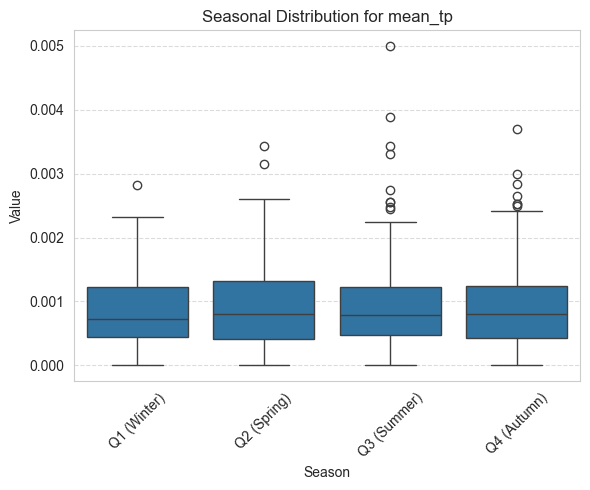

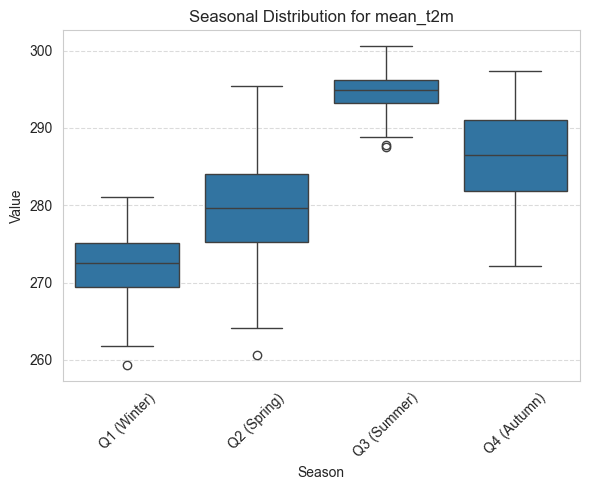

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the weekly data
weekly_lake_mean_df = pd.read_csv('/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/2009_2023_climate/weekly_lake_mean_climate.csv')

# Convert 'date' to datetime
weekly_lake_mean_df['startdate_standard'] = pd.to_datetime(weekly_lake_mean_df['date'])

# Ignore the direction in the wind speed
weekly_lake_mean_df['mean_u10'] = weekly_lake_mean_df['mean_u10'].abs()
weekly_lake_mean_df['mean_v10'] = weekly_lake_mean_df['mean_v10'].abs()

# Add a column for the quarter based on month
def assign_quarter(month):
    if month in [12, 1, 2]:
        return 'Q1 (Winter)'
    elif month in [3, 4, 5]:
        return 'Q2 (Spring)'
    elif month in [6, 7, 8]:
        return 'Q3 (Summer)'
    elif month in [9, 10, 11]:
        return 'Q4 (Autumn)'

weekly_lake_mean_df['quarter'] = weekly_lake_mean_df['date'].dt.month.apply(assign_quarter)

variables_to_plot = ['mean_tp', 'mean_t2m']

# Create boxplots for each variable
for variable in variables_to_plot:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='quarter', y=variable, data=weekly_lake_mean_df, order=['Q1 (Winter)', 'Q2 (Spring)', 'Q3 (Summer)', 'Q4 (Autumn)'])
    plt.title(f'Seasonal Distribution for {variable}')
    plt.ylabel('Value')
    plt.xlabel('Season')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



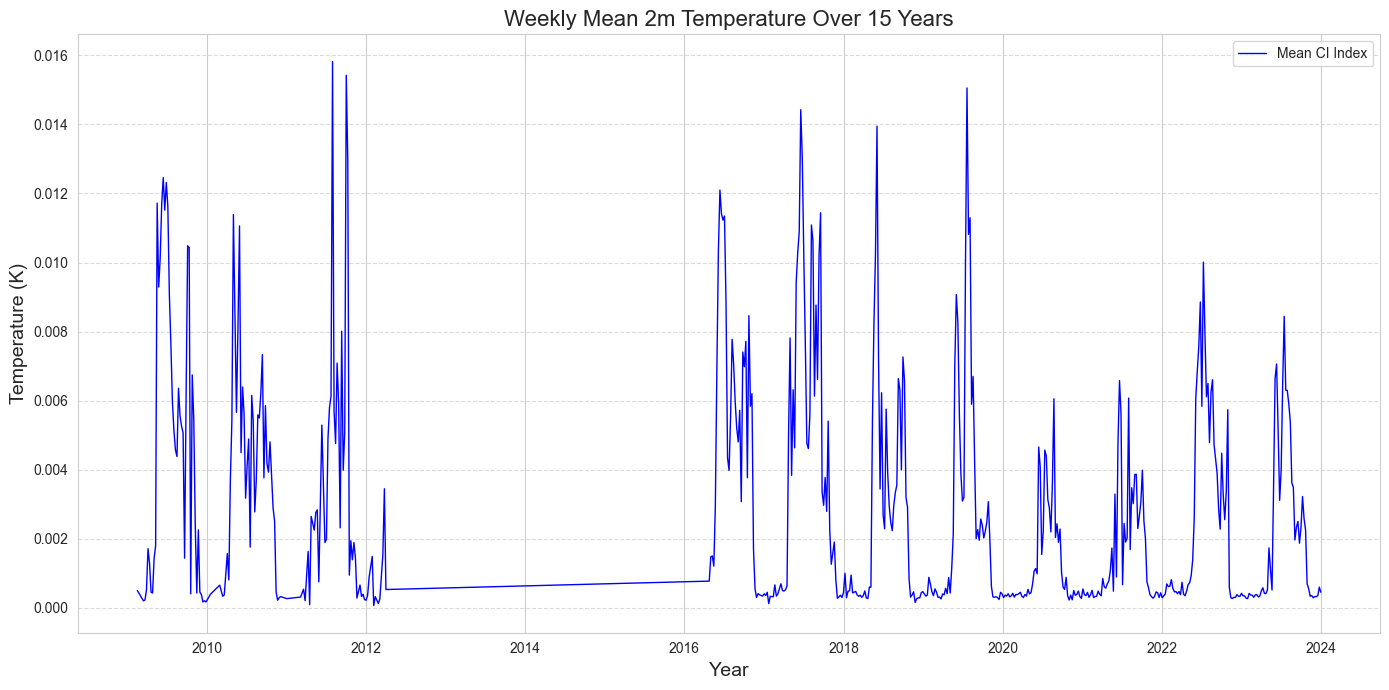

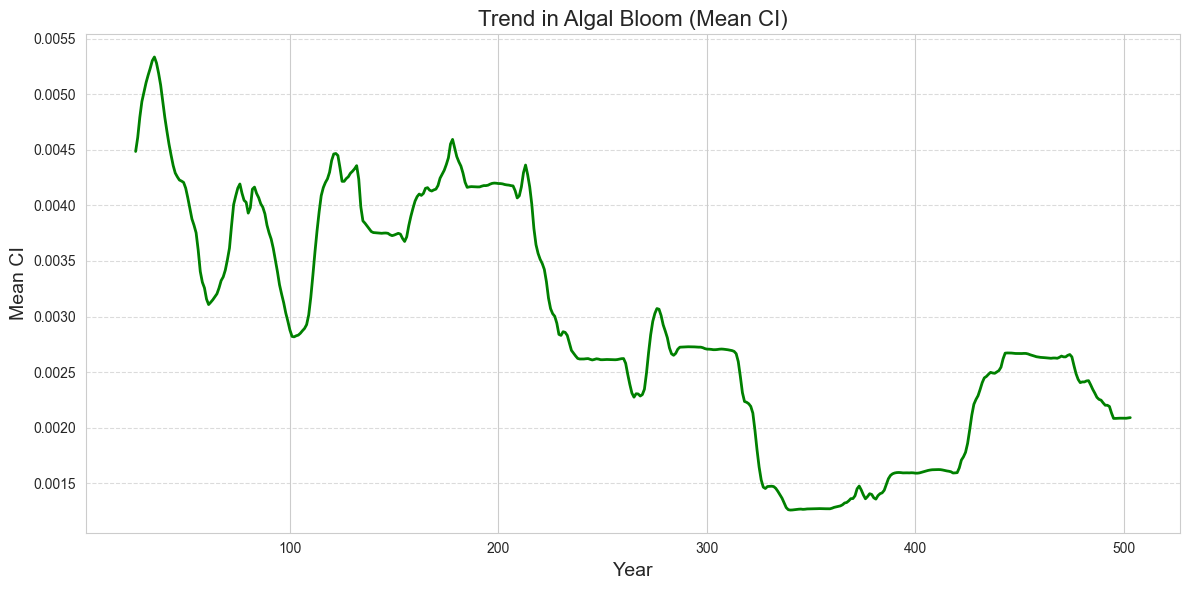

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the weekly data
weekly_algal_mean_df = pd.read_csv('/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/Algal_Data/filtered_algal_weekly_statistics.csv')
weekly_algal_mean_df = weekly_algal_mean_df.dropna()
weekly_algal_mean_df['startdate_standard'] = pd.to_datetime(weekly_algal_mean_df['startdate_standard'])
# Plot the time series for mean_t2m
plt.figure(figsize=(14, 7))
plt.plot(weekly_algal_mean_df ['startdate_standard'], weekly_algal_mean_df['mean_ci'], label='Mean CI Index', color='blue', linewidth=1)
# plt.plot(weekly_lake_mean_df['date'], weekly_lake_mean_df['wind_spped'], label='Mean 2m Temperature', color='blue', linewidth=1)
plt.title('Weekly Mean 2m Temperature Over 15 Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (K)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


# # Set 'date' as index if not already done
# weekly_lake_mean_df.set_index('date', inplace=True)
# 
# # Perform seasonal decomposition
# Decompose algal bloom data
decomposition_algal = seasonal_decompose(weekly_algal_mean_df['mean_ci'], model='additive', period=52)

# Extract trend for algal bloom
trend_algal = decomposition_algal.trend

# Create a single plot for algal bloom trend
plt.figure(figsize=(12, 6))
plt.plot(trend_algal, color='green', linewidth=2)
plt.title('Trend in Algal Bloom (Mean CI)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean CI', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


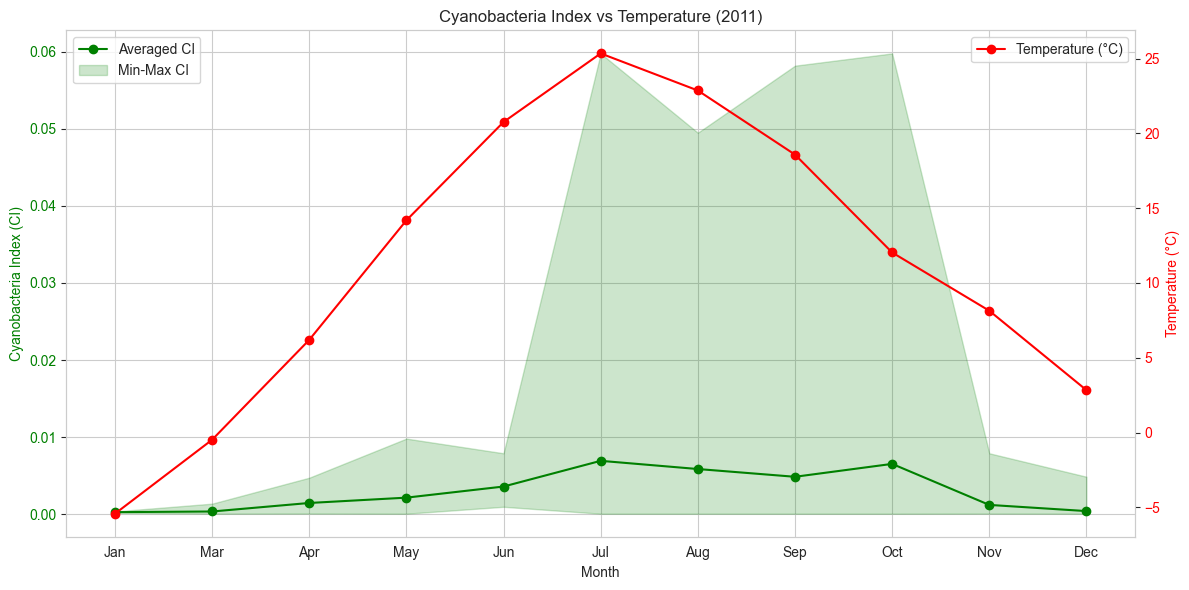

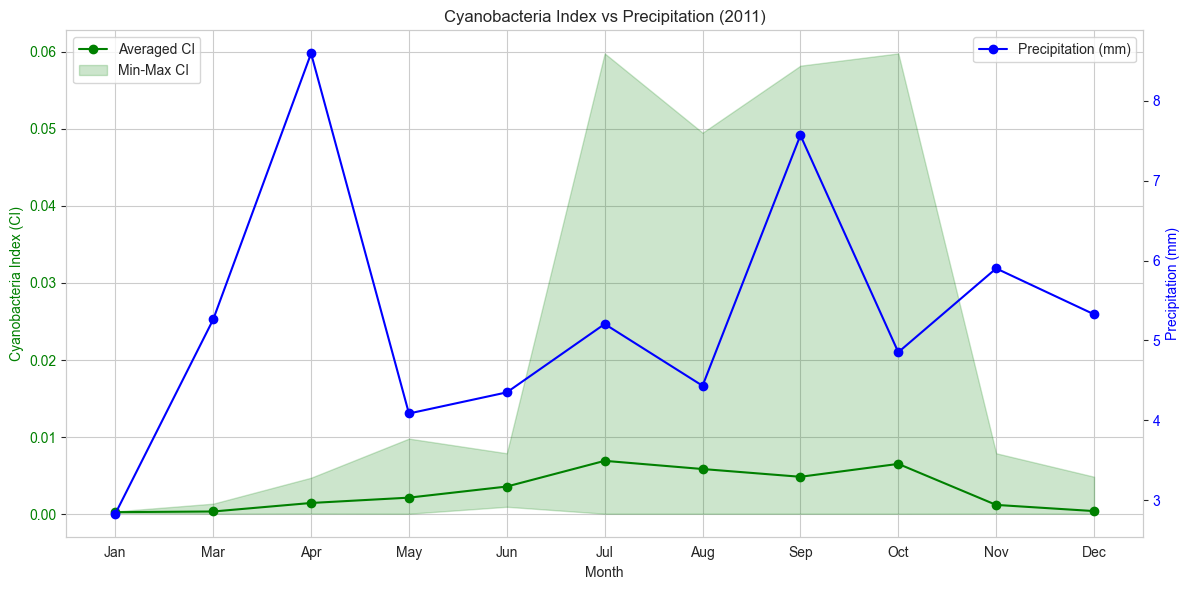

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load Data
climate_data = pd.read_csv('/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/2009_2023_climate/monthly_lake_mean_climate.csv')
algal_data = pd.read_csv('/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/Algal_Data/filtered_algal_monthly_statistics.csv')

# Convert `date` columns to datetime format
climate_data['date'] = pd.to_datetime(climate_data['date'])
algal_data['date'] = pd.to_datetime(algal_data[['year', 'month']].assign(day=1))

# Step 2: Align Dates
# For climate_data: Ensure the 'date' column has only year and month
climate_data['date'] = climate_data['date'].dt.to_period('M').dt.to_timestamp()
# For algal_data: Create a 'date' column with the same format
algal_data['date'] = pd.to_datetime(algal_data[['year', 'month']].assign(day=1)).dt.to_period('M').dt.to_timestamp()

# Merge datasets on `date`
merged_data = pd.merge(climate_data, algal_data, on='date', how='inner')

# Step 3: Filter Data for 2011
data_2011 = merged_data[merged_data['date'].dt.year == 2011]

import matplotlib.pyplot as plt

# Step 1: Extract Relevant Data
months = data_2011['date'].dt.strftime('%b')  # Month names for the x-axis
ci_avg = data_2011['mean_ci_mean']
ci_min = data_2011['min_ci_min']
ci_max = data_2011['max_ci_max']
temperature = data_2011['mean_t2m'] - 273.15  # Convert from Kelvin to Celsius
precipitation = data_2011['mean_tp'] * 1000  # Convert from meters to millimeters

# Step 2: Create the Plot with Two Y-Axes for Cyanobacteria Index vs Temperature
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary y-axis (Cyanobacteria Index)
ax1.plot(months, ci_avg, label='Averaged CI', color='green', marker='o')
ax1.fill_between(months, ci_min, ci_max, color='green', alpha=0.2, label='Min-Max CI')
ax1.set_ylabel('Cyanobacteria Index (CI)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xlabel('Month')
ax1.set_title('Cyanobacteria Index vs Temperature (2011)')

# Secondary y-axis (Temperature)
ax2 = ax1.twinx()
ax2.plot(months, temperature, label='Temperature (°C)', color='red', marker='o')
ax2.set_ylabel('Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid()
plt.tight_layout()
plt.show()

# Step 3: Create the Plot with Two Y-Axes for Cyanobacteria Index vs Precipitation
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary y-axis (Cyanobacteria Index)
ax1.plot(months, ci_avg, label='Averaged CI', color='green', marker='o')
ax1.fill_between(months, ci_min, ci_max, color='green', alpha=0.2, label='Min-Max CI')
ax1.set_ylabel('Cyanobacteria Index (CI)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xlabel('Month')
ax1.set_title('Cyanobacteria Index vs Precipitation (2011)')

# Secondary y-axis (Precipitation)
ax2 = ax1.twinx()
ax2.plot(months, precipitation, label='Precipitation (mm)', color='blue', marker='o')
ax2.set_ylabel('Precipitation (mm)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid()
plt.tight_layout()
plt.show()



IndexError: index 2 is out of bounds for axis 0 with size 2

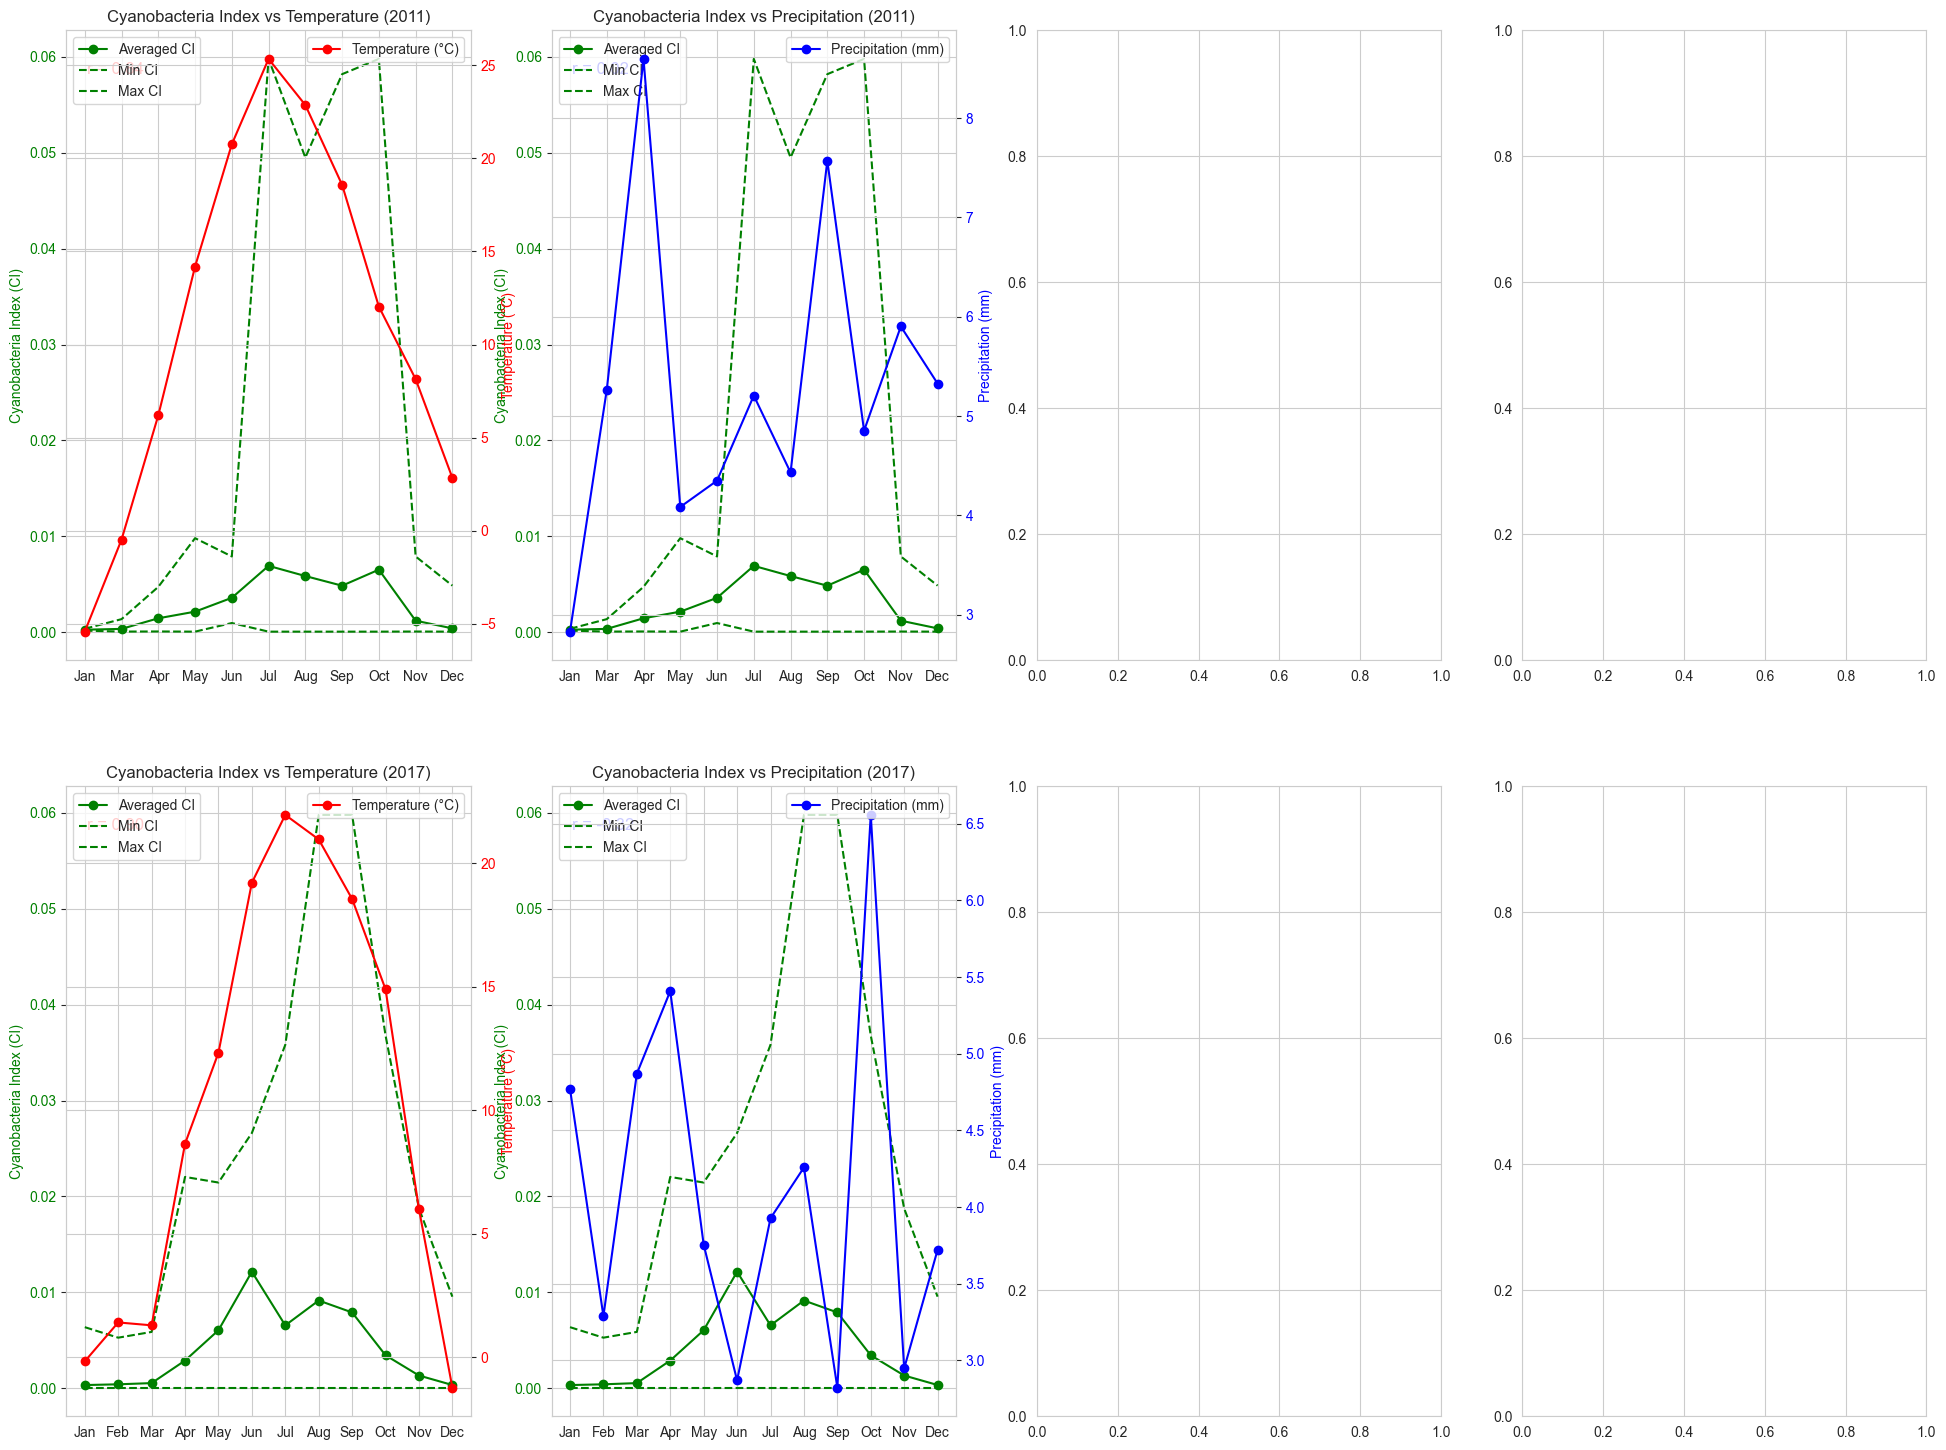

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Filter data for the selected years
selected_years = [2011, 2017, 2019, 2022]
data_selected = merged_data[merged_data['date'].dt.year.isin(selected_years)]

# Step 2: Prepare the figure
fig, axs = plt.subplots(2, 4, figsize=(24, 18), sharex=False)

# Step 3: Loop through each year and create subplots
for idx, year in enumerate(selected_years):
    data_year = data_selected[data_selected['date'].dt.year == year]
    months = data_year['date'].dt.strftime('%b')  # Month names for the x-axis
    ci_avg = data_year['mean_ci_mean']
    ci_min = data_year['min_ci_min']
    ci_max = data_year['max_ci_max']
    temperature = data_year['mean_t2m'] - 273.15  # Convert Kelvin to Celsius
    precipitation = data_year['mean_tp'] * 1000  # Convert meters to millimeters

    # Calculate correlations
    corr_ci_temp = np.corrcoef(ci_avg, temperature)[0, 1]
    corr_ci_precip = np.corrcoef(ci_avg, precipitation)[0, 1]

    # Create two plots for each year
    # (a) Cyanobacteria Index vs Temperature
    ax1 = axs[idx, 0]
    ax1.plot(months, ci_avg, label='Averaged CI', color='green', marker='o')
    ax1.plot(months, ci_min, linestyle='--', color='green', label='Min CI')
    ax1.plot(months, ci_max, linestyle='--', color='green', label='Max CI')
    ax1.set_ylabel('Cyanobacteria Index (CI)', color='green')
    ax1.tick_params(axis='y', labelcolor='green')
    ax1.set_title(f'Cyanobacteria Index vs Temperature ({year})')
    ax1.text(0.05, 0.95, f'r = {corr_ci_temp:.2f}', transform=ax1.transAxes, fontsize=12, color='red',
             verticalalignment='top')

    ax2 = ax1.twinx()
    ax2.plot(months, temperature, label='Temperature (°C)', color='red', marker='o')
    ax2.set_ylabel('Temperature (°C)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # (b) Cyanobacteria Index vs Precipitation
    ax1 = axs[idx, 1]
    ax1.plot(months, ci_avg, label='Averaged CI', color='green', marker='o')
    ax1.plot(months, ci_min, linestyle='--', color='green', label='Min CI')
    ax1.plot(months, ci_max, linestyle='--', color='green', label='Max CI')
    ax1.set_ylabel('Cyanobacteria Index (CI)', color='green')
    ax1.tick_params(axis='y', labelcolor='green')
    ax1.set_title(f'Cyanobacteria Index vs Precipitation ({year})')
    ax1.text(0.05, 0.95, f'r = {corr_ci_precip:.2f}', transform=ax1.transAxes, fontsize=12, color='blue',
             verticalalignment='top')

    ax2 = ax1.twinx()
    ax2.plot(months, precipitation, label='Precipitation (mm)', color='blue', marker='o')
    ax2.set_ylabel('Precipitation (mm)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()


/var/folders/7f/4x3f4byj3dn1rx36mbbzv0xw0000gn/T/ipykernel_15359/1508847923.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['month'] = data_selected['date'].dt.strftime('%b')
/var/folders/7f/4x3f4byj3dn1rx36mbbzv0xw0000gn/T/ipykernel_15359/1508847923.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['year'] = data_selected['date'].dt.year
/var/folders/7f/4x3f4byj3dn1rx36mbbzv0xw0000gn/T/ipykernel_15359/1508847923.py:13: SettingWithCopyWarning: 
A value is trying to be set 

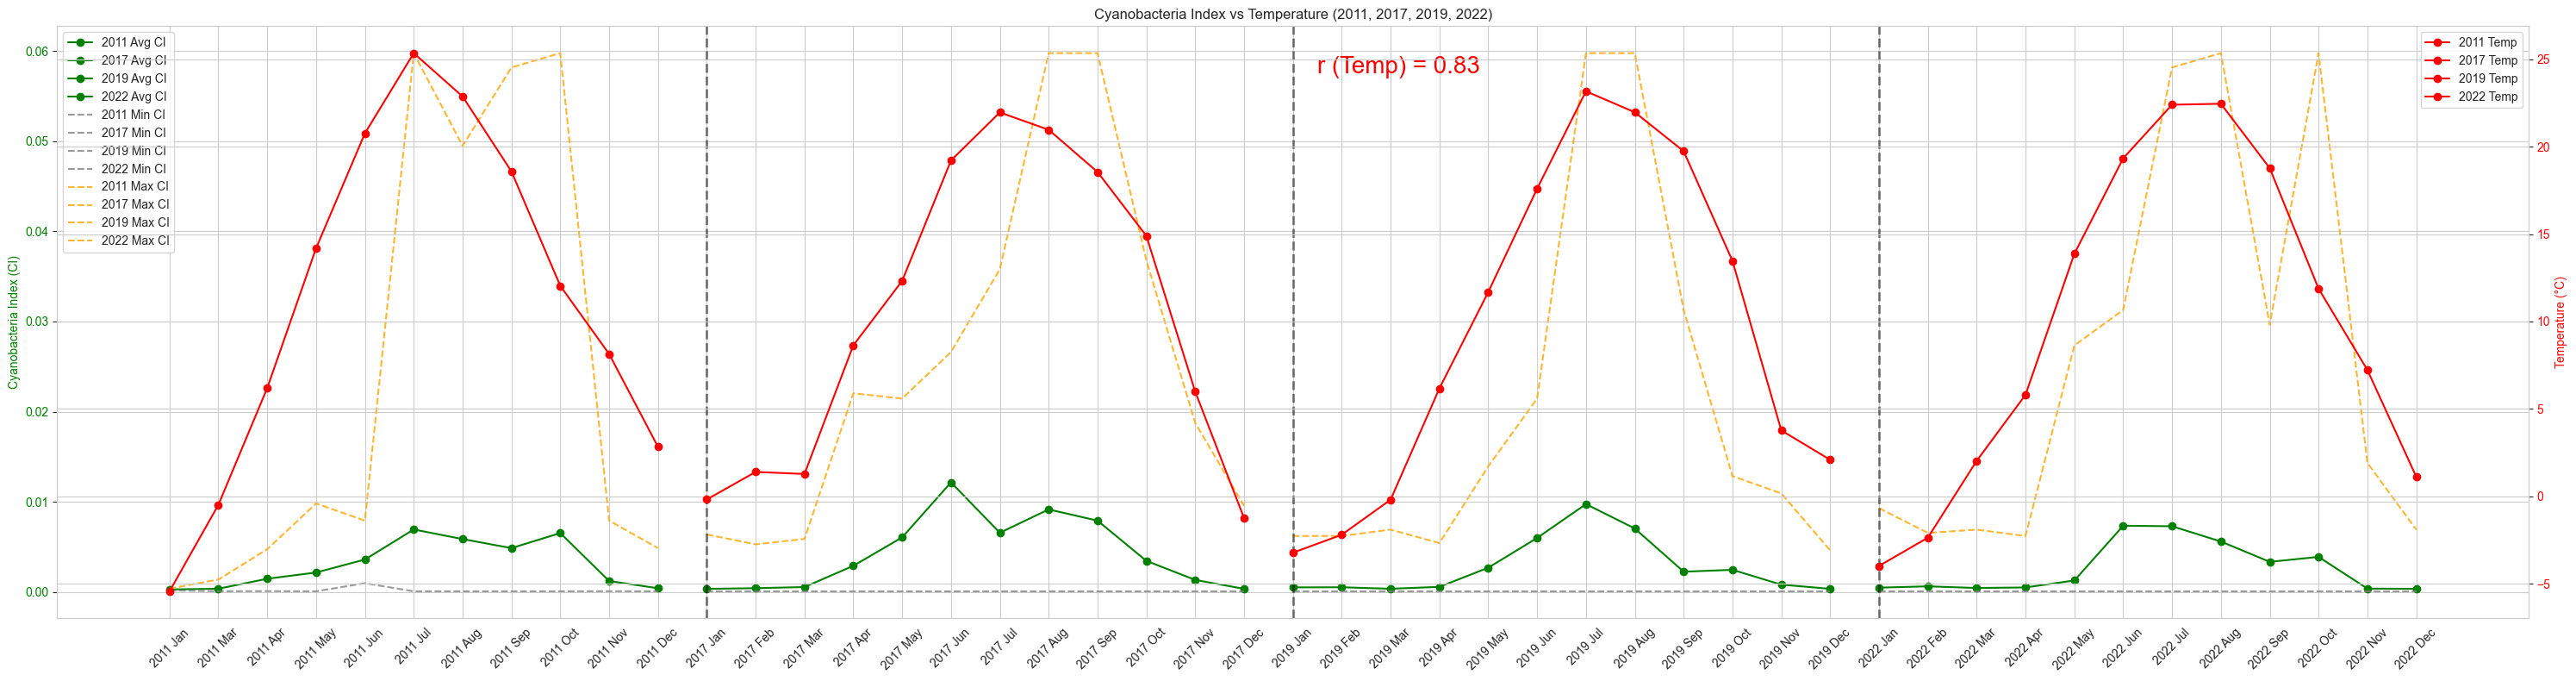

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Filter Data for Selected Years
selected_years = [2011, 2017, 2019, 2022]
data_selected = merged_data[merged_data['date'].dt.year.isin(selected_years)]

# Add 'month' and 'year' columns
data_selected['month'] = data_selected['date'].dt.strftime('%b')
data_selected['year'] = data_selected['date'].dt.year

# Create a combined x-axis: "Jan Feb ... Dec; Jan Feb ... Dec" for all years
data_selected['x_label'] = data_selected['year'].astype(str) + " " + data_selected['month']
x_labels = data_selected['x_label'].unique()

# Step 2: Calculate Correlations
corr_temp = np.corrcoef(data_selected['mean_ci_mean'], data_selected['mean_t2m'])[0, 1]  # Temperature correlation

# Step 3: Generate the Plot for Cyanobacteria Index and Temperature
fig, ax1 = plt.subplots(figsize=(30, 8))

# Plot Mean CI
for year in selected_years:
    year_data = data_selected[data_selected['year'] == year]
    ax1.plot(year_data['x_label'], year_data['mean_ci_mean'], label=f'{year} Avg CI', marker='o', color='green')

# Plot Min CI with distinct color
for year in selected_years:
    year_data = data_selected[data_selected['year'] == year]
    ax1.plot(year_data['x_label'], year_data['min_ci_min'], linestyle='--', label=f'{year} Min CI', color='grey', alpha=0.8)

# Plot Max CI with distinct color
for year in selected_years:
    year_data = data_selected[data_selected['year'] == year]
    ax1.plot(year_data['x_label'], year_data['max_ci_max'], linestyle='--', label=f'{year} Max CI', color='orange', alpha=0.8)

ax1.set_title('Cyanobacteria Index vs Temperature (2011, 2017, 2019, 2022)')
ax1.set_ylabel('Cyanobacteria Index (CI)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticks(x_labels)
ax1.tick_params(axis='x', rotation=45)

# Add vertical dashed lines to divide years
for i in range(len(selected_years) - 1):
    ax1.axvline(x=x_labels[12 * (i + 1) - 1], linestyle='--', linewidth=2, color='black', alpha=0.5)

# Add text for correlation
ax1.text(0.51, 0.95, f'r (Temp) = {corr_temp:.2f}', transform=ax1.transAxes, fontsize=20, color='red', verticalalignment='top')

# Add secondary axis for Temperature
ax2 = ax1.twinx()
for year in selected_years:
    year_data = data_selected[data_selected['year'] == year]
    ax2.plot(year_data['x_label'], year_data['mean_t2m'] - 273.15, label=f'{year} Temp', linestyle='-', marker='o', color='red')
ax2.set_ylabel('Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig('/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/2009_2023_climate/cyanobacteria_vs_tem.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()


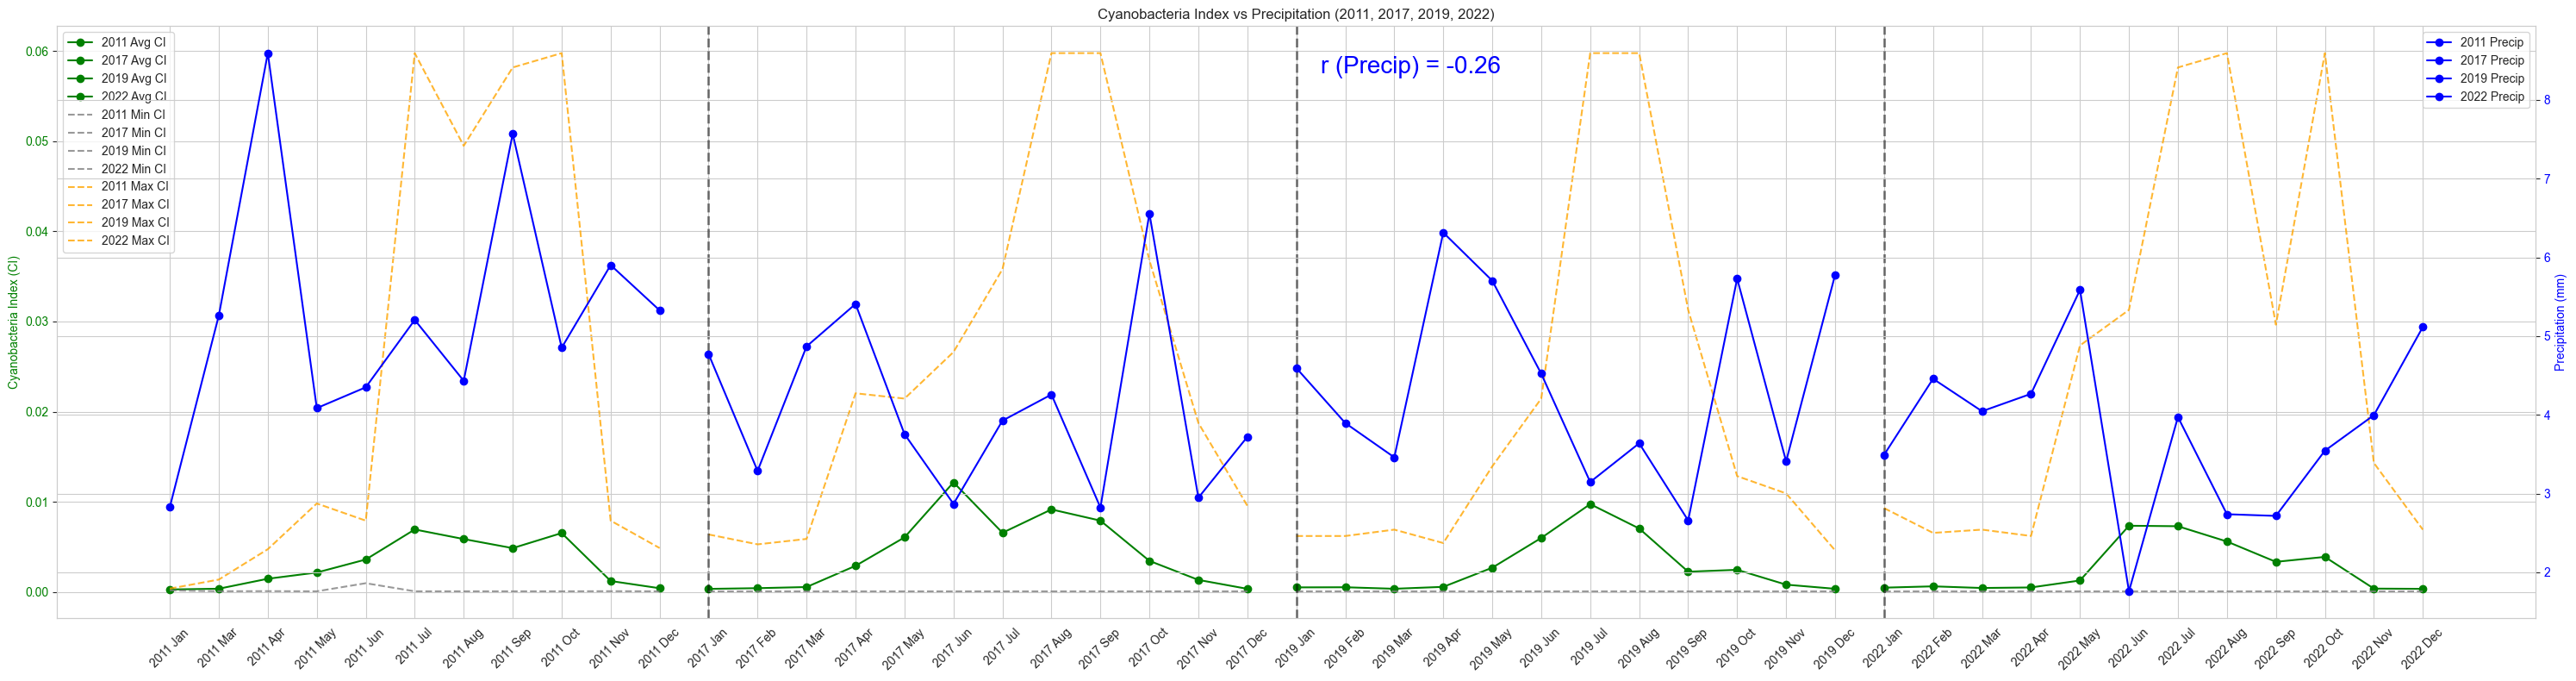

In [49]:
# Save the plot for Cyanobacteria Index vs Precipitation
fig, ax1 = plt.subplots(figsize=(30, 8))

# Plot Mean CI
for year in selected_years:
    year_data = data_selected[data_selected['year'] == year]
    ax1.plot(year_data['x_label'], year_data['mean_ci_mean'], label=f'{year} Avg CI', marker='o', color='green')

# Plot Min CI with distinct color
for year in selected_years:
    year_data = data_selected[data_selected['year'] == year]
    ax1.plot(year_data['x_label'], year_data['min_ci_min'], linestyle='--', label=f'{year} Min CI', color='grey', alpha=0.8)

# Plot Max CI with distinct color
for year in selected_years:
    year_data = data_selected[data_selected['year'] == year]
    ax1.plot(year_data['x_label'], year_data['max_ci_max'], linestyle='--', label=f'{year} Max CI', color='orange', alpha=0.8)

ax1.set_title('Cyanobacteria Index vs Precipitation (2011, 2017, 2019, 2022)')
ax1.set_ylabel('Cyanobacteria Index (CI)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticks(x_labels)
ax1.tick_params(axis='x', rotation=45)

# Add vertical dashed lines to divide years
for i in range(len(selected_years) - 1):
    ax1.axvline(x=x_labels[12 * (i + 1) - 1], linestyle='--', linewidth=2, color='black', alpha=0.5)

# Add text for correlation
ax1.text(0.51, 0.95, f'r (Precip) = {corr_precip:.2f}', transform=ax1.transAxes, fontsize=20, color='blue', verticalalignment='top')

# Add secondary axis for Precipitation
ax2 = ax1.twinx()
for year in selected_years:
    year_data = data_selected[data_selected['year'] == year]
    ax2.plot(year_data['x_label'], year_data['mean_tp'] * 1000, label=f'{year} Precip', linestyle='-', marker='o', color='blue')  # Convert precipitation to mm
ax2.set_ylabel('Precipitation (mm)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legends
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Save the figure
plt.tight_layout()
plt.savefig('/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/2009_2023_climate/cyanobacteria_vs_precipitation.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

plt.show()


In [19]:

## reanalysis wind speed

import geopandas as gpd
import pandas
import pandas as pd
import xarray as xr
import rioxarray
from xarray.tutorial import open_dataset
import numpy as np

lakes = gpd.read_file(
    '/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/Lakes_Boundary/ne_10m_lakes.shp')
lakes = lakes.to_crs(epsg=4326)

variable_mapping = {
    "10m_u_component_of_wind": "u10",
    "10m_v_component_of_wind": "v10",
}

lake_daily_means = []
for var, nc_var in variable_mapping.items():

    file_pattern = f'/Users/shenxiaobo/Desktop/PhD Research/WWenSWenCShenJPritchett_CEE506_ESDA_FinalProject/2009_2023_climate/2009_2023_{var}_daily.nc'
    dataset = xr.open_dataset(file_pattern)

    # Set CRS if not already set
    if not dataset[nc_var].rio.crs:
        dataset[nc_var] = dataset[nc_var].rio.write_crs("EPSG:4326")

    daily_means = []
    for date in dataset['valid_time'].values:
        var_day = dataset.sel(valid_time=date)[nc_var]
        var_day = np.abs(var_day)
        erie_geom = lakes.loc[lakes['name'] == 'Lake Erie', 'geometry'].values[0]
        clipped = var_day.rio.clip([erie_geom], drop=True, all_touched=True)

        # Calculate the mean temperature over the clipped area and store the result
        mean_var = clipped.mean().item()
        daily_means.append({
            'date': pd.Timestamp(date).strftime('%Y-%m-%d'),
            f'mean_{nc_var}': mean_var
        })

    means_df = pd.DataFrame(daily_means)
    lake_daily_means.append(means_df)
daily_windspeed_lake_mean_df = pd.concat(lake_daily_means, axis=1)

    # # Convert the pivoted DataFrame to an xarray.Dataset
    # ds = pivot_df.to_xarray()
    # output_file_path = f"/Users/shenxiaobo/Desktop/PhD Research/Wildfire Impacts/Data/2013_2023_analysis/counties_2013_2023_{var}_daily.nc"
    # ds.to_netcdf(output_file_path)



In [20]:
daily_windspeed_lake_mean_df

,date,mean_u10,date,mean_v10
0,2009-01-01,2.360823,2009-01-01,1.384084
1,2009-01-02,3.549102,2009-01-02,4.997641
2,2009-01-03,3.979390,2009-01-03,1.672292
3,2009-01-04,3.669501,2009-01-04,1.146406
4,2009-01-05,5.737953,2009-01-05,0.572514
...,...,...,...,...
5473,2023-12-27,2.105129,2023-12-27,1.574329
5474,2023-12-28,0.760055,2023-12-28,1.136785
5475,2023-12-29,3.478498,2023-12-29,2.697255
5476,2023-12-30,4.352579,2023-12-30,0.754377


ValueError: cannot assemble with duplicate keys